In [1]:
!reentry scan -r aiida
!verdi daemon start

Starting the daemon... RUNNING


In [2]:
import aiida
from aiida.orm import Code
aiida.load_profile()

In [22]:

#!verdi code list
#code = Code.get_from_string('siesta-psml-support@N552VW')
code = Code.get_from_string('siesta-psml-lua@N552VW')
#print(code)
from aiida.orm import StructureData
cell = [[15.0, 0.0, 0.0,],
        [ 0.0,15.0, 0.0,],
        [ 0.0, 0.0,15.0,],
        ]
s = StructureData(cell=cell)
s.append_atom(position=( 0.000 , 0.000 , 0.000 ),symbols=['O']) #1
s.append_atom(position=( 0.757 , 0.586 , 0.000 ),symbols=['H']) #2
s.append_atom(position=(-0.757 , 0.586 , 0.000),symbols=['H']) #3 
s.append_atom(position=( 0.000 , 3.500 , 0.000),symbols=['O']) #4
s.append_atom(position=( 0.757 , 2.914 , 0.000 ),symbols=['H']) #5
s.append_atom(position=(-0.757 , 2.914 , 0.000),symbols=['H']) #6

#s.get_pymatgen_structure()
from aiida.orm import Dict
parameters = Dict(dict={
   "mesh-cutoff": "250 Ry",
   "dm-tolerance": "0.0001",
   "MD-TypeOfRun":   "LUA",
   "LUA-script":   "neb.lua",
   "DM-NumberPulay ":  "3",
   "DM-History-Depth":  "0",
   "SCF-Mixer-weight":  "0.02",
   "SCF-Mix":   "density",
   "SCF-Mixer-kick":  "35",
   "MD-VariableCell":  "F",
   "MD-MaxCGDispl":  "0.3 Bohr",
   "MD-MaxForceTol":  " 0.04000 eV/Ang",
    "%block Geometry-Constraints":
    """
    atom  [1 -- 4]
    %endblock Geometry-Constraints"""    
    })
#   "DM-UseSaveDM":  "T",
#parameters.get_dict()
#parent_calc_folder

In [23]:
#te=s.get_cif()

In [24]:
#te.export('/home/aakhtar/calculations/siesta/test-neb-aiida/neb-test/te','cif')

In [25]:
import os
from aiida_siesta.data.psf import PsfData
pseudo_file_to_species_map = [ ("H.psf", ['H']),("O.psf", ['O'])]
pseudos_dict = {}
for fname, kinds, in pseudo_file_to_species_map:
      absname = os.path.realpath(os.path.join("./",fname))
      pseudo, created = PsfData.get_or_create(absname, use_first=True)
      for j in kinds:
              pseudos_dict[j]=pseudo
pseudos_dict

{'H': <PsfData: uuid: ff59cc29-55e8-45a0-a284-f5c3c945765f (pk: 521)>,
 'O': <PsfData: uuid: 4e885319-c33a-42fb-ae15-6f923cb84c5a (pk: 3)>}

In [26]:
from aiida_siesta.data.lua import LUAData
lua_file_to_species_map = [ ("neb.lua", ['lua']),
                            ("image_0.xyz", ['images0']),
                            ("image_1.xyz", ['images1']),
                            ("image_2.xyz", ['images2']),
                            ("image_3.xyz", ['images3']),
                            ("image_4.xyz", ['images4']),
                            ("image_5.xyz", ['images5']),
                            ("image_6.xyz", ['images6']),
                          ]
lua_dict = {}
for fname, kinds, in lua_file_to_species_map:
      absname = os.path.realpath(os.path.join("./",fname))
      lua, created = LUAData.get_or_create(absname, use_first=True)
      for j in kinds:
              lua_dict[j]=lua
lua_dict

{'lua': <LUAData: uuid: 3e14cce9-fb6a-44a0-82a0-151a845f75c1 (pk: 547)>,
 'images0': <LUAData: uuid: ae1f475b-bcae-40d6-bbd2-a9be11e92bd1 (pk: 523)>,
 'images1': <LUAData: uuid: d2d8b658-2719-402e-b878-719817da62b2 (pk: 524)>,
 'images2': <LUAData: uuid: d5001609-016f-4933-8725-2affad512080 (pk: 525)>,
 'images3': <LUAData: uuid: c92f4a4e-77be-4359-9f93-ea16895d5a76 (pk: 526)>,
 'images4': <LUAData: uuid: 460c54e9-a8f1-4813-a486-7e39a1a6ce7e (pk: 527)>,
 'images5': <LUAData: uuid: 362afadf-68ec-4265-8e88-c9e90e951e4d (pk: 528)>,
 'images6': <LUAData: uuid: 6b3a1114-6434-49f6-b291-eaf20e0314a2 (pk: 529)>}

In [27]:
#luaDM={}
#luaDM['DM1']=LUAData.get_or_create("image_6.xyz",use_first=True)

In [28]:
#luaDM

In [29]:
!pwd

/home/aakhtar/calculations/siesta/test-neb-aiida/with-remote-folder


In [31]:
#from aiida.orm import SinglefileData
#RemoteData("/home/aakhtar/calculations/siesta/test-neb-aiida/with-remote-folder/aiida.DM.1")
#RemoteData("/home/aakhtar/calculations/siesta/test-neb-aiida/with-remote-folder/aiida.DM.2")
#RemoteData("/home/aakhtar/calculations/siesta/test-neb-aiida/with-remote-folder/aiida.DM.3")
#RemoteData("/home/aakhtar/calculations/siesta/test-neb-aiida/with-remote-folder/aiida.DM.4")
#RemoteData("/home/aakhtar/calculations/siesta/test-neb-aiida/with-remote-folder/aiida.DM.5")


In [33]:
#SinglefileData.store()
#RemoteData.get_computer_name

In [34]:
#a.set_attribute(remote_computer=code.get_remote_computer)

In [35]:
from aiida.orm import Dict
#'pao-basistype':'split',
#'pao-splitnorm': 0.150,
#'pao-energyshift': '0.020 Ry',
basis_dict = {
  "%block PAO-Basis":
    """
O                     2     
 n=2   0   2                
   3.305      2.510
   1.000      1.000
 n=2   1   2 P   1                   
   3.937      2.542
   1.000      1.000
H                     1              
 n=1   0   2 P   1                   
   4.828      3.855
   1.000      1.000
%endblock PAO-Basis""",
}

basis = Dict(dict=basis_dict)
from aiida.orm import KpointsData
kpoints=KpointsData()
kp_mesh = 5
mesh_displ = 0.5 #optional
#kpoints.set_kpoints_mesh([kp_mesh,kp_mesh,kp_mesh],[mesh_displ,mesh_displ,mesh_displ])
kpoints.set_kpoints_mesh([1,1,1],[mesh_displ,mesh_displ,mesh_displ])

In [36]:
settings_dict = {
  'additional_retrieve_list': ['aiida.EIG', 'aiida.ORB_INDX','NEB.results','NEB.1.T'],
}
settings = Dict(dict=settings_dict)


In [37]:
from aiida_siesta.calculations.siesta import SiestaCalculation
builder = SiestaCalculation.get_builder()

In [38]:
builder.code = code
builder.structure = s
builder.parameters = parameters
builder.pseudos = pseudos_dict
builder.basis = basis
builder.kpoints = kpoints
#builder.lua= folder
builder.settings=settings
builder.luafiles = lua_dict
#builder.parent_calc_folder=RemoteData
#builder.parent_calc_folder=RemoteData

In [39]:
print(builder)

{'metadata': {'options': {}}, 'pseudos': {'H': <PsfData: uuid: ff59cc29-55e8-45a0-a284-f5c3c945765f (pk: 521)>, 'O': <PsfData: uuid: 4e885319-c33a-42fb-ae15-6f923cb84c5a (pk: 3)>}, 'luafiles': {'lua': <LUAData: uuid: 3e14cce9-fb6a-44a0-82a0-151a845f75c1 (pk: 547)>, 'images0': <LUAData: uuid: ae1f475b-bcae-40d6-bbd2-a9be11e92bd1 (pk: 523)>, 'images1': <LUAData: uuid: d2d8b658-2719-402e-b878-719817da62b2 (pk: 524)>, 'images2': <LUAData: uuid: d5001609-016f-4933-8725-2affad512080 (pk: 525)>, 'images3': <LUAData: uuid: c92f4a4e-77be-4359-9f93-ea16895d5a76 (pk: 526)>, 'images4': <LUAData: uuid: 460c54e9-a8f1-4813-a486-7e39a1a6ce7e (pk: 527)>, 'images5': <LUAData: uuid: 362afadf-68ec-4265-8e88-c9e90e951e4d (pk: 528)>, 'images6': <LUAData: uuid: 6b3a1114-6434-49f6-b291-eaf20e0314a2 (pk: 529)>}, 'code': <Code: Remote code 'siesta-psml-lua' on N552VW, pk: 403, uuid: 872001d8-73fb-4b50-be30-4b947bd271b1>, 'structure': <StructureData: uuid: 98f6a5fe-b8a2-49ad-9f96-185a7bc5b1bf (unstored)>, 'param

In [40]:
builder.metadata.options.resources = {'num_machines': 1,
                                     "num_mpiprocs_per_machine": 6}
builder.metadata.options.withmpi= True
builder.metadata.options.max_wallclock_seconds = 864000
builder.parent_calc_folder

In [41]:
from aiida.engine import run,submit #,submit_test
results = run(builder)
#results=submit_test(builder)

In [42]:
results

{'output_parameters': <Dict: uuid: 542b2104-32df-4cd8-bbd3-c4365706dbfb (pk: 587)>,
 'output_structure': <StructureData: uuid: 23d855ef-656c-4ebb-9422-37c51d8c7b54 (pk: 588)>,
 'forces_and_stress': <ArrayData: uuid: b854f2d8-b2d9-4f59-8f89-95965427390e (pk: 589)>,
 'retrieved': <FolderData: uuid: b456e35e-be5a-4e53-a37f-bbc7bb810f24 (pk: 586)>,
 'remote_folder': <RemoteData: uuid: eaea6ad9-20e2-4704-8429-7f2888b986ae (pk: 585)>}

In [43]:
results['forces_and_stress']

<ArrayData: uuid: b854f2d8-b2d9-4f59-8f89-95965427390e (pk: 589)>

In [116]:
results['retrieved'].

<bound method Entity.get of <class 'aiida.orm.nodes.data.folder.FolderData'>>

In [66]:
results['output_parameters'].pk

565

In [44]:
!verdi process show 584

Property     Value
-----------  ------------------------------------
type         SiestaCalculation
state        Finished [0]
pk           584
uuid         733e96c5-090b-4718-804f-ca839db6012e
label
description
ctime        2020-06-05 09:30:29.109962+00:00
mtime        2020-06-05 09:52:34.253330+00:00
computer     [1] N552VW

Inputs       PK    Type
-----------  ----  -------------
luafiles
    images6  529   LUAData
    images5  528   LUAData
    images4  527   LUAData
    images3  526   LUAData
    images2  525   LUAData
    images1  524   LUAData
    images0  523   LUAData
    lua      547   LUAData
pseudos
    O        3     PsfData
    H        521   PsfData
basis        581   Dict
code         403   Code
kpoints      582   KpointsData
parameters   580   Dict
settings     583   Dict
structure    579   StructureData

Outputs              PK  Type
-----------------  ----  -------------
forces_and_stress   589  ArrayData
output_parameters   587  Dict
output_structure    588  Structur

In [104]:
def NEB_Results(pk,Number_of_images):
    from aiida.orm import load_node
    neb_results_node=load_node(pk) #load_node('584')
    neb_resutls_retrieved=neb_results_node.outputs.retrieved 
    neb_results=neb_resutls_retrieved.get_object_content('NEB.results')
    Number_of_images=Number_of_images
    data_temp=[]
    data_temp.append(neb_results.splitlines())
    data=[]
    for line in range(len(data_temp[0])):
            if line>2:
                #print (line)
                data.append(data_temp[0][line])
    del data_temp
    while '' in data:   #removing Null strings between each neb stage
        data.remove('')
    image_number=[]
    reaction_coordinates=[]
    Energy=[]
    E_diff=[]
    Curvature=[]
    Max_Force=[]
    for i in range(len(data)):
        image_number.append(float(data[i].split()[0]))
        reaction_coordinates.append(float(data[i].split()[1]))
        Energy.append(float(data[i].split()[2]))
        E_diff.append(float(data[i].split()[3]))
        Curvature.append(float(data[i].split()[4]))
        Max_Force.append(float(data[i].split()[5]))
    #Last NEB
    Total_Number=Number_of_images+2
    shift=len(E_diff)-Total_Number
    #-----------------------------------------------
    # Final Values
    #-----------------------------------------------
    image_number_Final=np.array([])
    reaction_coordinates_Final=np.array([])
    Energy_Final=np.array([])
    E_diff_Final=np.array([])
    Curvature_Final=np.array([])
    Max_Force_Final=np.array([])
    for i in range(Total_Number):
        image_number_Final=np.append(image_number_Final,int(image_number[shift+i]))
        reaction_coordinates_Final=np.append(reaction_coordinates_Final,reaction_coordinates[shift+i])
        E_diff_Final=np.append(E_diff_Final,E_diff[shift+i])
        Energy_Final=np.append(Energy_Final,Energy[shift+i])
        Curvature_Final=np.append(Curvature_Final,Curvature[shift+i])
        Max_Force_Final=np.append(Max_Force_Final,Max_Force[shift+i])
    min_neb=max(Energy_Final)
    max_neb=min(Energy_Final)
    Barrier=abs(max_neb-min_neb)
    return (image_number_Final,
            reaction_coordinates_Final,
            E_diff_Final,
            Energy_Final,
            Curvature_Final,
            Max_Force_Final,
            Barrier)

In [105]:
NEB_Results('584',5)

(array([0., 1., 2., 3., 4., 5., 6.]),
 array([0.        , 0.71013424, 1.42013929, 2.13245406, 2.83897025,
        3.54764721, 4.25729541]),
 array([ 0.        , -0.03945156, -0.04646856, -0.0162596 , -0.03643492,
        -0.09788832, -0.1181499 ]),
 array([-931.67386317, -931.71331473, -931.72033173, -931.69012278,
        -931.7102981 , -931.77175149, -931.79201308]),
 array([ 0.        ,  0.05276156, -0.02989586, -0.02052187,  0.07872529,
         0.0964803 ,  0.        ]),
 array([0.        , 0.00800886, 0.01669669, 0.02160538, 0.02953163,
        0.0354487 , 0.        ]),
 0.11814990266998393)

In [100]:
max_neb=max(NEB_Results('584',5)[3])
min_neb=min(NEB_Results('584',5)[3])

In [101]:
max_neb-min_neb

0.11814990266998393

In [82]:

#-----------------------------------------------
# Final For Plot
#-----------------------------------------------

In [83]:
Energy_Final

[array(-931.67386317),
 array(-931.71331473),
 array(-931.72033173),
 array(-931.69012278),
 array(-931.7102981),
 array(-931.77175149),
 array(-931.79201308)]

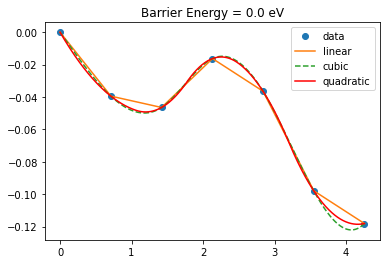

In [76]:
import os, shutil
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from scipy import interpolate
im=[]
x=[]
y=[]
y2=[]
for i in range(Total_Number):
    im.append(np.array(int(image_number[shift+i])))
    x.append(np.array(reaction_coordinates[shift+i]))
    y.append(np.array(E_diff[shift+i]))
    y2.append(np.array(Energy[shift+i]))
#xnew = np.linspace(0, 10, num=41, endpoint=True)
#f = interp1d(x, y)
xnew = np.linspace(0, x[len(x)-1], num=1000, endpoint=True)
f1=interp1d(x, y,kind='linear')
f2=interp1d(x, y, kind='cubic')
f3=interp1d(x, y, kind='quadratic')

#tck = interpolate.splrep(x, y, s=0)
#ynew = interpolate.splev(x, tck, der=0)
#plt.plot(x,ynew,'o',xnew,f3(xnew),"-")
plt.plot(x,y,"o",xnew,f1(xnew),"-",xnew,f2(xnew),"--",xnew,f3(xnew),'r')
plt.title("Barrier Energy = "+str(max(E_diff))+" eV")
plt.legend(['data', 'linear', 'cubic','quadratic'], loc='best')
#plt.plot(x,y,"o",x,ynew,'+')
plt.show()

In [81]:
#==========================================================================
# Script for Energy vs Basis calculation 
# Written by Arsalan Akhtar 
# ICN2 31-August-2017 v-0.1
# ICN2 1-October-2018 v-0.2
# ICN2 2-October-2018 v-0.3
# ICN2 2-October-2018 v-0.4
#==========================================================================
# Libray imports
import os, shutil
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from scipy import interpolate
#==========================================================================
#x_plot_min=
#x_plot_max=


# In[147]:

print ("*******************************************************************")
print ("This is a test script written by A.Akhtar for Ploting NEB")
print ("Email:arsalan.akhtar@icn2.cat")
print ("*******************************************************************")
#%%
NAME_OF_NEB_RESULTS='NEB.results'
data=[]
with open(NAME_OF_NEB_RESULTS) as f:
    for ind, line in enumerate(f, 1):
        if ind>2:
            #print (line)
            data.append(line)     
while '\n' in data:
    data.remove('\n')
#%%
image_number=[]
reaction_coordinates=[]
Energy=[]
E_diff=[]
Curvature=[]
Max_Force=[]
for i in range(len(data)):
    image_number.append(float(data[i].split()[0]))
    reaction_coordinates.append(float(data[i].split()[1]))
    Energy.append(float(data[i].split()[2]))
    E_diff.append(float(data[i].split()[3]))
    Curvature.append(float(data[i].split()[4]))
    Max_Force.append(float(data[i].split()[5]))
#Last NEB
Number_of_images=5
Total_Number=Number_of_images+2
shift=len(E_diff)-Total_Number

im=[]
x=[]
y=[]
y2=[]
for i in range(Total_Number):
    im.append(np.array(int(image_number[shift+i])))
    x.append(np.array(reaction_coordinates[shift+i]))
    y.append(np.array(E_diff[shift+i]))
    y2.append(np.array(Energy[shift+i]))
#xnew = np.linspace(0, 10, num=41, endpoint=True)
#f = interp1d(x, y)
xnew = np.linspace(0, x[len(x)-1], num=1000, endpoint=True)
f1=interp1d(x, y,kind='linear')
f2=interp1d(x, y, kind='cubic')
f3=interp1d(x, y, kind='quadratic')

#tck = interpolate.splrep(x, y, s=0)
#ynew = interpolate.splev(x, tck, der=0)
#plt.plot(x,ynew,'o',xnew,f3(xnew),"-")
plt.plot(x,y,"o",xnew,f1(xnew),"-",xnew,f2(xnew),"--",xnew,f3(xnew),'r')
plt.title("Barrier Energy = "+str(max(E_diff))+" eV")
plt.legend(['data', 'linear', 'cubic','quadratic'], loc='best')
#plt.plot(x,y,"o",x,ynew,'+')
plt.show()

*******************************************************************
This is a test script written by A.Akhtar for Ploting NEB
Email:arsalan.akhtar@icn2.cat
*******************************************************************


FileNotFoundError: [Errno 2] No such file or directory: 'NEB.results'

In [80]:
y2

[array(-931.67386317),
 array(-931.71331473),
 array(-931.72033173),
 array(-931.69012278),
 array(-931.7102981),
 array(-931.77175149),
 array(-931.79201308)]

In [26]:
#---------------------
#Examples
#------------------------
#b=load_node('567')
#b.get_arraynames()
#b.get_array('forces')

In [ ]:
#---------------------------------
#Example for sending DM or images
#---------------------------------
q=QueryBuilder
q.append(computer)
for i in q.iterall():
    print (i)
from aiida.orn import RemoteData
a=RemoteData()
a.computer=load_computer(2)
a.set_remote_path("")
a.store()

In [ ]:
folder=load_node('')
builer.parnet_calc_folder=folder